# K Nearest Neighbors Algorithm
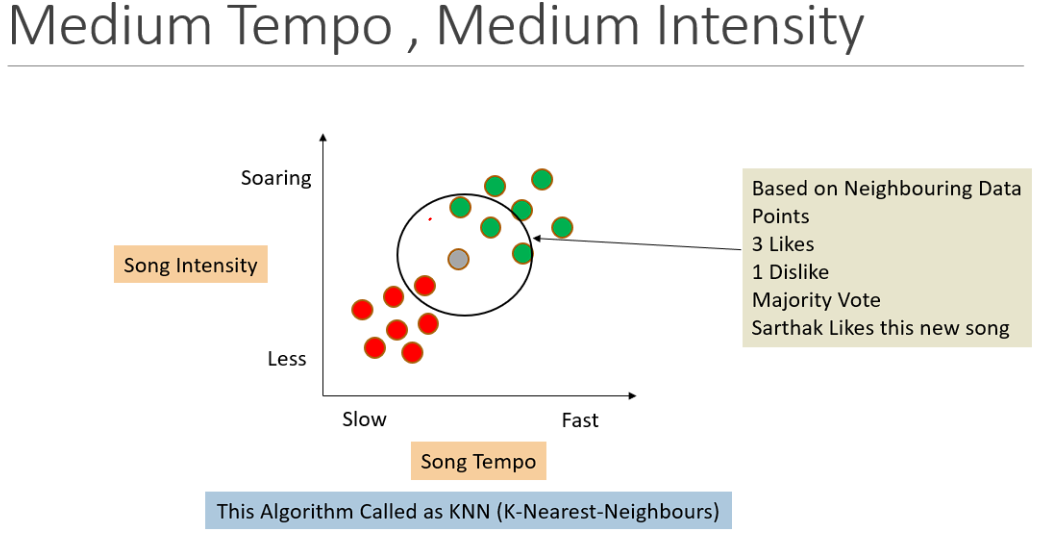

In [1]:
from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
import pandas as pd 
df = pd.read_csv('iris.csv')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [4]:
df.isna().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [5]:
df.duplicated().sum()

1

## Seperate X and Y Feature

In [6]:
X = df.drop(columns=['species'])
Y = df[['species']]

In [7]:
X.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [8]:
Y.head()

,species
0,setosa
1,setosa
2,setosa
3,setosa
4,setosa


### Create Preprocessing Pipeline for X

In [9]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

In [10]:
num_pipe = Pipeline(steps=[('impute',SimpleImputer(strategy='mean')),
                           ('scaler',StandardScaler())])

In [11]:
 X_pre = num_pipe.fit_transform(X)
X_pre[0:5]

array([[-0.90068117,  1.01900435, -1.34022653, -1.3154443 ],
       [-1.14301691, -0.13197948, -1.34022653, -1.3154443 ],
       [-1.38535265,  0.32841405, -1.39706395, -1.3154443 ],
       [-1.50652052,  0.09821729, -1.2833891 , -1.3154443 ],
       [-1.02184904,  1.24920112, -1.34022653, -1.3154443 ]])

In [12]:
cols = num_pipe.get_feature_names_out()
cols

array(['sepal_length', 'sepal_width', 'petal_length', 'petal_width'],
      dtype=object)

In [13]:
X_pre = pd.DataFrame(X_pre, columns=cols)
X_pre.head()

,sepal_length,sepal_width,petal_length,petal_width
0,-0.900681,1.019004,-1.340227,-1.315444
1,-1.143017,-0.131979,-1.340227,-1.315444
2,-1.385353,0.328414,-1.397064,-1.315444
3,-1.506521,0.098217,-1.283389,-1.315444
4,-1.021849,1.249201,-1.340227,-1.315444


### Train Test Split

In [14]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(X_pre, Y, test_size=0.33, random_state=21)

In [15]:
xtrain.shape

(100, 4)

In [16]:
xtest.shape

(50, 4)

In [17]:
ytrain.value_counts()

species   
virginica     35
versicolor    33
setosa        32
Name: count, dtype: int64

In [18]:
ytest.value_counts()

species   
setosa        18
versicolor    17
virginica     15
Name: count, dtype: int64

### Create K-Neighbors Classifier Algorithm

In [19]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=40)
model.fit(xtrain, ytrain)

KNeighborsClassifier(n_neighbors=40)

In [20]:
model.score(xtrain, ytrain)

0.88

In [21]:
model.score(xtest, ytest)

0.82

### Hyperparameter Tuning

In [22]:
params = {'n_neighbors':[2,3,4,5,6,7,8,9,10,11]}

In [23]:
from sklearn.model_selection import RandomizedSearchCV
knn = KNeighborsClassifier()
rscv = RandomizedSearchCV(knn,param_distributions=params, cv=5, scoring='f1_macro')
rscv.fit(xtrain, ytrain)

RandomizedSearchCV(cv=5, estimator=KNeighborsClassifier(),
                   param_distributions={'n_neighbors': [2, 3, 4, 5, 6, 7, 8, 9,
                                                        10, 11]},
                   scoring='f1_macro')

In [24]:
rscv.best_params_

{'n_neighbors': 3}

In [25]:
rscv.best_score_

0.9696658896658897

In [26]:
best_knn = rscv.best_estimator_
best_knn

KNeighborsClassifier(n_neighbors=3)

### Evaluate Best KNN model

In [27]:
best_knn.score(xtrain, ytrain)

0.97

In [28]:
best_knn.score(xtest, ytest)

0.88

### Predict results for Train and Test

In [29]:
ypred_tr = best_knn.predict(xtrain)
ypred_ts = best_knn.predict(xtest)

In [30]:
ypred_tr[0:5]

array(['versicolor', 'setosa', 'versicolor', 'virginica', 'versicolor'],
      dtype=object)

In [31]:
ytrain.head()

,species
52,versicolor
49,setosa
65,versicolor
118,virginica
55,versicolor


In [32]:
ypred_ts[0:5]

array(['versicolor', 'setosa', 'setosa', 'setosa', 'versicolor'],
      dtype=object)

In [33]:
ytest.head()

,species
92,versicolor
44,setosa
7,setosa
21,setosa
95,versicolor


### Confusion Matrix

In [34]:
best_knn.classes_

array(['setosa', 'versicolor', 'virginica'], dtype=object)

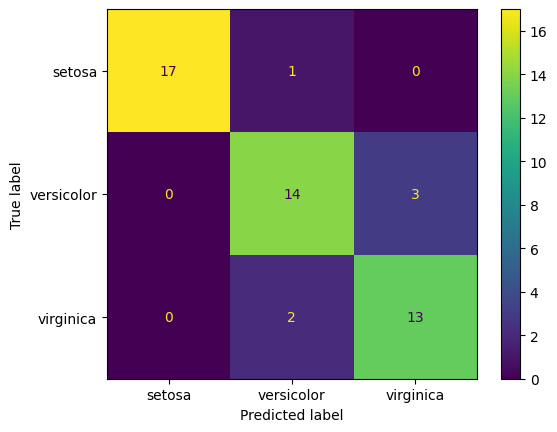

In [35]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cf = confusion_matrix(ytest, ypred_ts)
cfd = ConfusionMatrixDisplay(cf, display_labels=best_knn.classes_)
cfd.plot()

### Print Classification Report

In [36]:
from sklearn.metrics import classification_report
print(classification_report(ytest, ypred_ts))

              precision    recall  f1-score   support

      setosa       1.00      0.94      0.97        18
  versicolor       0.82      0.82      0.82        17
   virginica       0.81      0.87      0.84        15

    accuracy                           0.88        50
   macro avg       0.88      0.88      0.88        50
weighted avg       0.88      0.88      0.88        50



### Predicting Out of Sample Data

In [38]:
xnew = pd.read_csv('iris_sample.csv')
xnew

,sepal_length,sepal_width,petal_length,petal_width
0,5.5,2.5,4.0,1.3
1,6.9,3.1,5.1,2.3
2,5.1,2.5,3.0,1.1
3,4.4,2.9,NaN,0.2
4,5.9,3.0,5.1,1.8
5,5.5,3.5,1.3,0.2
6,5.6,NaN,3.6,1.3
7,6.5,3.0,5.2,2.0
8,5.3,3.7,1.5,0.2
9,5.1,3.4,1.5,NaN


In [39]:
xnew.isna().sum()

sepal_length    0
sepal_width     1
petal_length    1
petal_width     1
dtype: int64

In [40]:
xnew.duplicated().sum()

0

In [42]:
xnew_pre = num_pipe.transform(xnew)
xnew_pre

array([[-4.46992002e-01, -1.08654049e+00,  9.96392944e-02,
         2.15739144e-02],
       [ 1.25970473e+00,  4.09679202e-01,  8.66861861e-01,
         1.53174793e+00],
       [-9.34619640e-01, -1.08654049e+00, -5.97835766e-01,
        -2.80460888e-01],
       [-1.78796801e+00, -8.90606962e-02,  0.00000000e+00,
        -1.63961750e+00],
       [ 4.06356365e-02,  1.60309253e-01,  8.66861861e-01,
         7.76660920e-01],
       [-4.46992002e-01,  1.40715900e+00, -1.78354337e+00,
        -1.63961750e+00],
       [-3.25085092e-01,  1.10742504e-15, -1.79350730e-01,
         2.15739144e-02],
       [ 7.72077094e-01,  1.60309253e-01,  9.36609367e-01,
         1.07869572e+00],
       [-6.90805821e-01,  1.90589890e+00, -1.64404836e+00,
        -1.63961750e+00],
       [-9.34619640e-01,  1.15778905e+00, -1.64404836e+00,
         3.35325992e-16],
       [ 2.84449456e-01, -3.38430646e-01,  9.96392944e-02,
         2.15739144e-02],
       [-4.46992002e-01, -1.33591044e+00, -1.09603224e-01,
      

In [43]:
xnew_pre = pd.DataFrame(xnew_pre, columns=cols)
xnew_pre

,sepal_length,sepal_width,petal_length,petal_width
0,-0.446992,-1.086540e+00,0.099639,2.157391e-02
1,1.259705,4.096792e-01,0.866862,1.531748e+00
2,-0.934620,-1.086540e+00,-0.597836,-2.804609e-01
3,-1.787968,-8.906070e-02,0.000000,-1.639617e+00
4,0.040636,1.603093e-01,0.866862,7.766609e-01
5,-0.446992,1.407159e+00,-1.783543,-1.639617e+00
6,-0.325085,1.107425e-15,-0.179351,2.157391e-02
7,0.772077,1.603093e-01,0.936609,1.078696e+00
8,-0.690806,1.905899e+00,-1.644048,-1.639617e+00
9,-0.934620,1.157789e+00,-1.644048,3.353260e-16


In [44]:
preds = best_knn.predict(xnew_pre)
preds

array(['versicolor', 'virginica', 'versicolor', 'setosa', 'virginica',
       'setosa', 'versicolor', 'virginica', 'setosa', 'setosa',
       'versicolor', 'versicolor', 'virginica', 'versicolor', 'virginica'],
      dtype=object)

In [45]:
probs = best_knn.predict_proba(xnew_pre)
probs

array([[0.        , 1.        , 0.        ],
       [0.        , 0.        , 1.        ],
       [0.        , 1.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [0.        , 0.33333333, 0.66666667],
       [1.        , 0.        , 0.        ],
       [0.        , 1.        , 0.        ],
       [0.        , 0.        , 1.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [0.        , 1.        , 0.        ],
       [0.        , 1.        , 0.        ],
       [0.        , 0.        , 1.        ],
       [0.        , 1.        , 0.        ],
       [0.        , 0.33333333, 0.66666667]])

In [46]:
import numpy as np 
max_prob = np.max(probs, axis=1)
max_prob

array([1.        , 1.        , 1.        , 1.        , 0.66666667,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 0.66666667])

### save predictions and probability in xnew DataFrame

In [51]:
xnew['species_preds'] = preds
xnew['species_probs'] = max_prob

In [52]:
xnew

,sepal_length,sepal_width,petal_length,petal_width,species_preds,species_probs
0,5.5,2.5,4.0,1.3,versicolor,1.000000
1,6.9,3.1,5.1,2.3,virginica,1.000000
2,5.1,2.5,3.0,1.1,versicolor,1.000000
3,4.4,2.9,NaN,0.2,setosa,1.000000
4,5.9,3.0,5.1,1.8,virginica,0.666667
5,5.5,3.5,1.3,0.2,setosa,1.000000
6,5.6,NaN,3.6,1.3,versicolor,1.000000
7,6.5,3.0,5.2,2.0,virginica,1.000000
8,5.3,3.7,1.5,0.2,setosa,1.000000
9,5.1,3.4,1.5,NaN,setosa,1.000000


### save above file in resuls.csv

In [55]:
xnew.to_csv('Results.csv', index=False)